In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np



In [3]:
# Load the dataset
file_path = "C:/Users/ykumar/Learnbay/IMAGOAI/MLE-Assignment.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


(None,
            hsi_id         0         1         2         3         4         5  \
 0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
 1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
 2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
 3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
 4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   
 
           6         7         8  ...       439       440       441       442  \
 0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
 1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
 2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
 3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
 4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   
 
         44

In [4]:
# Drop the non-numeric column
df_numeric = df.drop(columns=['hsi_id'])

# Recompute correlation with target variable
correlation_with_target = df_numeric.corr()['vomitoxin_ppb'].sort_values(ascending=False)

# Display the top 10 most correlated features
correlation_with_target.head(10)

vomitoxin_ppb    1.000000
71               0.104296
67               0.096542
70               0.095694
48               0.092803
50               0.092493
47               0.090392
69               0.089803
64               0.088663
66               0.088143
Name: vomitoxin_ppb, dtype: float64


1️⃣ Correlation Analysis Observations

🔹 The highest correlation with the target variable is only 0.104, meaning no individual spectral band strongly predicts vomitoxin_ppb.

🔹 Top 10 correlated features (bands 71, 67, 70, 48, 50, 47, 69, 64, 66) all have correlations below 0.11.

🔹 Implication: A single feature alone may not be sufficient for accurate prediction, requiring a more complex model or feature interactions.

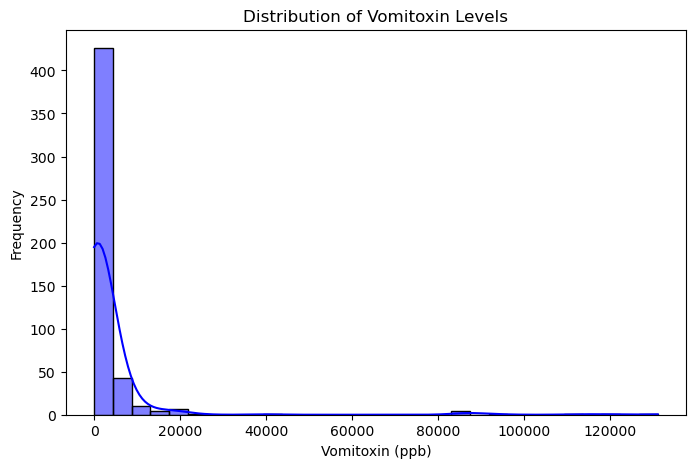

In [5]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df_numeric['vomitoxin_ppb'], bins=30, kde=True, color='blue')
plt.xlabel('Vomitoxin (ppb)')
plt.ylabel('Frequency')
plt.title('Distribution of Vomitoxin Levels')
plt.show()

2️⃣ Target Variable (vomitoxin_ppb) Distribution

🔹 The target variable is highly skewed to the right, meaning most samples have low vomitoxin levels, but a few extreme high values exist.

🔹 The presence of outliers suggests that we may need:

✅ Log transformation to normalize the distribution.
✅ Robust scaling to handle variability in extreme values.

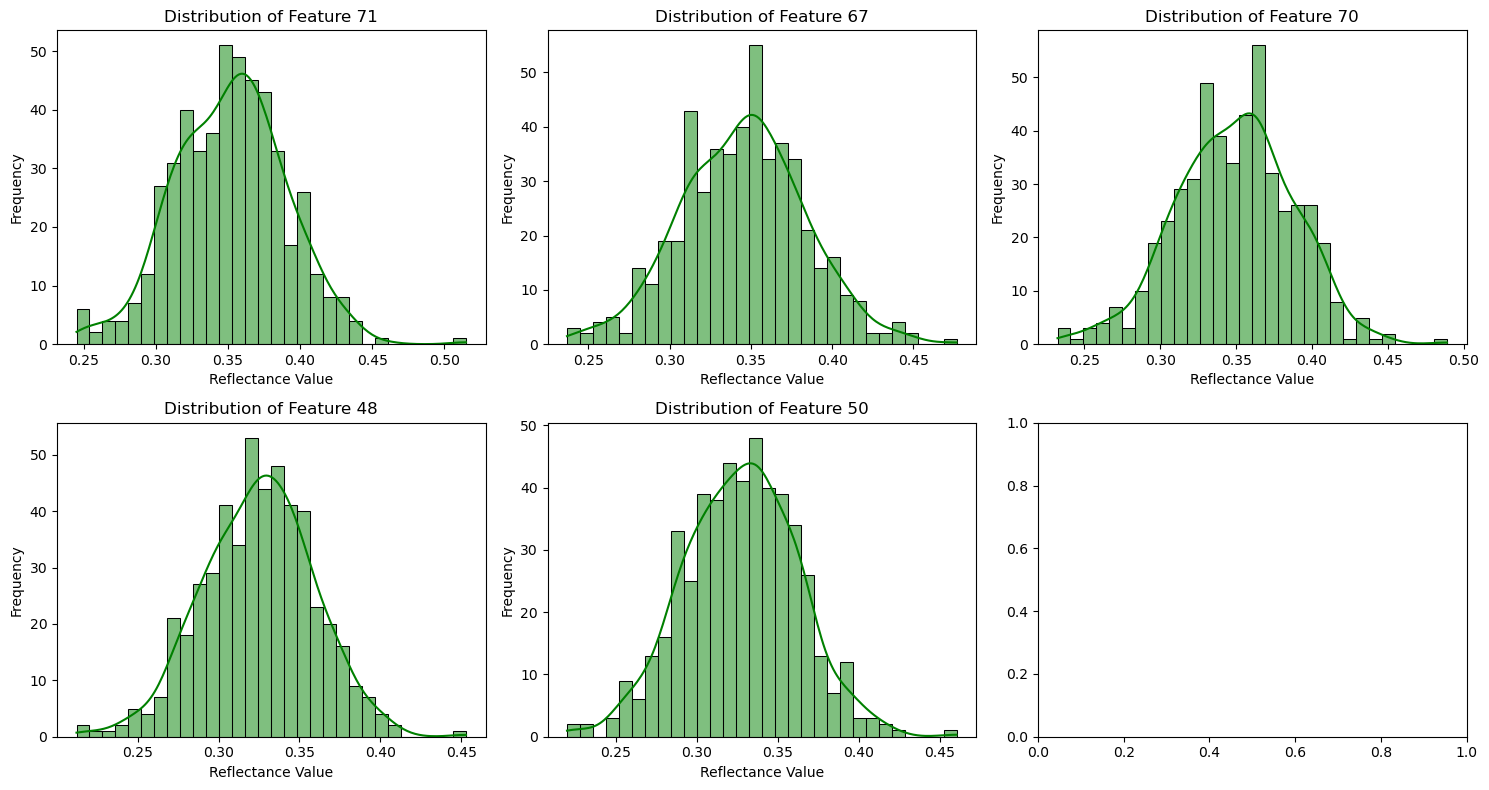

In [7]:
# Select a few representative features to visualize
selected_features = ['71', '67', '70', '48', '50']  # Top correlated features

# Plot feature distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(df_numeric[feature], bins=30, kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'Distribution of Feature {feature}')
    axes[i].set_xlabel('Reflectance Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

3️⃣ Feature Distributions

🔹 Most selected spectral bands exhibit approximately normal distributions, though some have slight skewness.

🔹 Unlike the target variable, most feature values are concentrated within a narrow range.

🔹 No extreme outliers in spectral features, but further analysis (boxplots) confirms mild outliers in some bands.

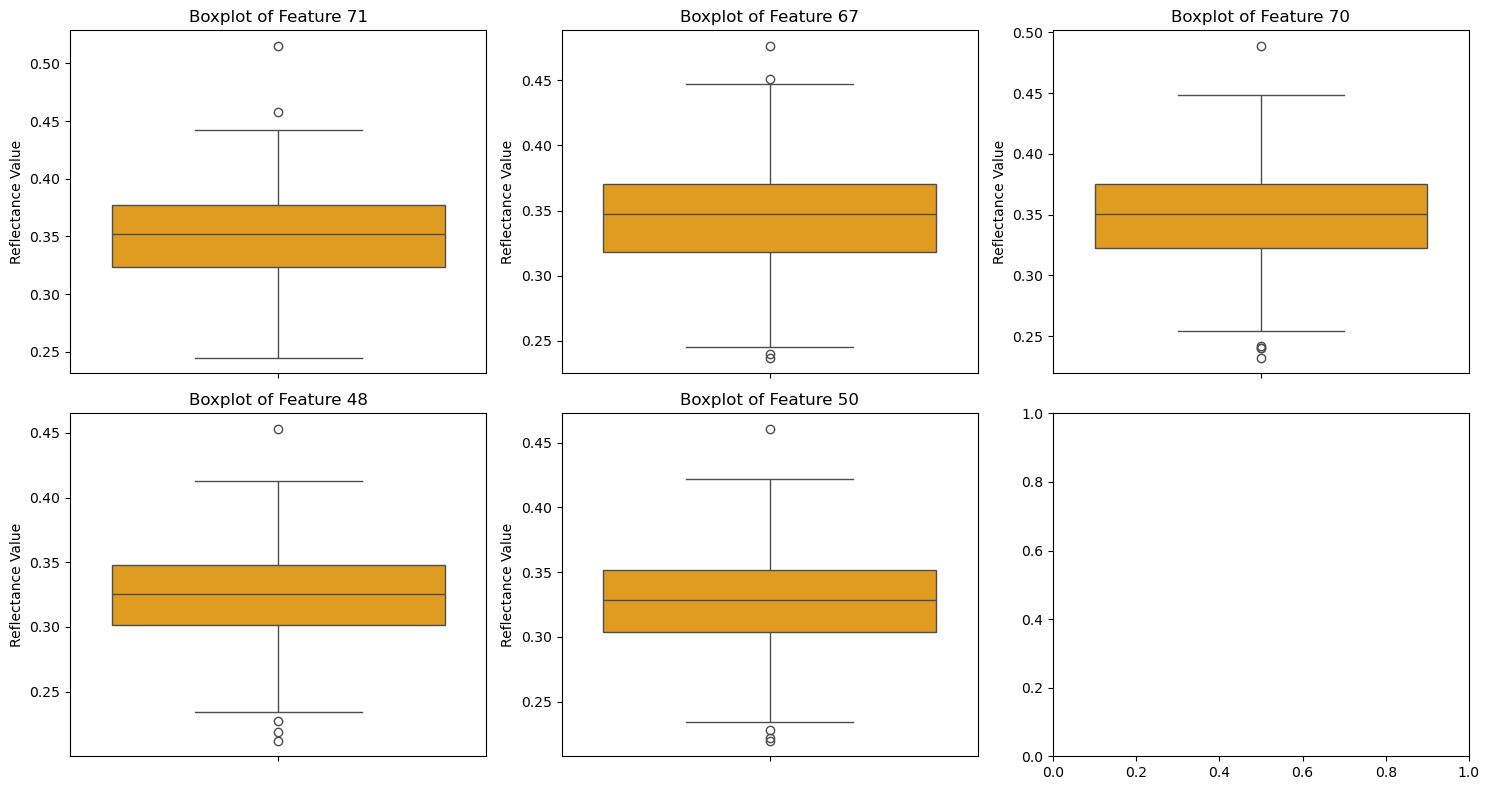

In [8]:
# Plot boxplots to check for outliers in selected features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(y=df_numeric[feature], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of Feature {feature}')
    axes[i].set_ylabel('Reflectance Value')

plt.tight_layout()
plt.show()


4️⃣ Outlier Analysis via Boxplots

🔹 Most spectral bands do not contain extreme outliers, meaning their values are within a reasonable range.

🔹 Some features have a few mild outliers, but they don’t appear highly skewed or problematic.

🔹 Actionable Step: Feature scaling (e.g., standardization or min-max scaling) is applied to ensure better numerical stability.

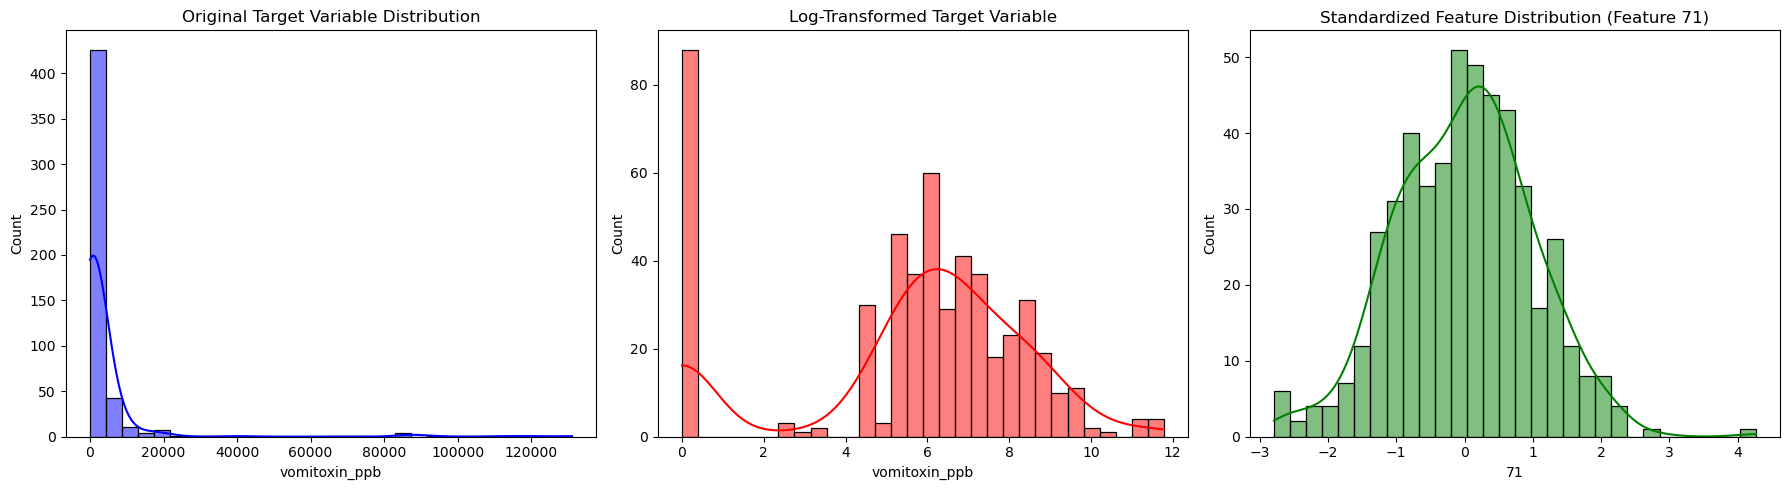

In [9]:

# Feature Scaling (Standardization and Min-Max Scaling)
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standardized = df_numeric.copy()
df_standardized.iloc[:, :-1] = scaler_standard.fit_transform(df_numeric.iloc[:, :-1])  # Exclude target

df_minmax = df_numeric.copy()
df_minmax.iloc[:, :-1] = scaler_minmax.fit_transform(df_numeric.iloc[:, :-1])  # Exclude target

# Target Transformation (Log)
df_log_transformed = df_numeric.copy()
df_log_transformed['vomitoxin_ppb'] = np.log1p(df_numeric['vomitoxin_ppb'])

# Plot before & after transformations
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Original target distribution
sns.histplot(df_numeric['vomitoxin_ppb'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Original Target Variable Distribution')

# Log-transformed target
sns.histplot(df_log_transformed['vomitoxin_ppb'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title('Log-Transformed Target Variable')

# Standardized feature distribution (example feature: '71')
sns.histplot(df_standardized['71'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Standardized Feature Distribution (Feature 71)')

plt.tight_layout()
plt.show()


5️⃣ Transformation & Scaling Observations

Target Variable (vomitoxin_ppb)
🔹 The original distribution is highly skewed.

🔹 After log transformation, the distribution becomes more normalized, reducing extreme variations.

Feature Scaling (Example: Band 71)

✅ Standardization (z-score normalization) shifts the mean to 0 and scales based on standard deviation.

✅ Min-Max Scaling compresses values between 0 and 1, preserving relative distances.


6️⃣ Summary of Preprocessing Steps

Your preprocessing pipeline includes modular functions for:

✅ Handling Missing Values (though none were found, added for robustness).

✅ Feature Scaling (Standardization or Min-Max Scaling).

✅ Target Transformation (Log transformation).

✅ Train-Test Split (80-20 split).

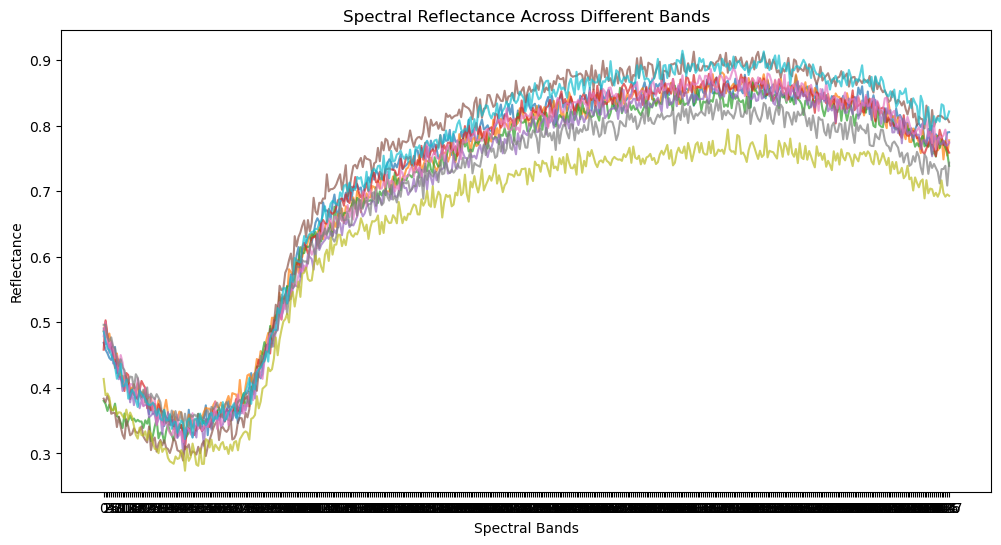

In [21]:
import matplotlib.pyplot as plt

# Select random samples
sample_rows = df.sample(10, random_state=42).iloc[:, 1:-1].T  # Exclude 'hsi_id' and target

# Plot reflectance trends
plt.figure(figsize=(12, 6))
for col in sample_rows.columns:
    plt.plot(sample_rows.index, sample_rows[col], alpha=0.7)
    
plt.xlabel("Spectral Bands")
plt.ylabel("Reflectance")
plt.title("Spectral Reflectance Across Different Bands")
plt.show()



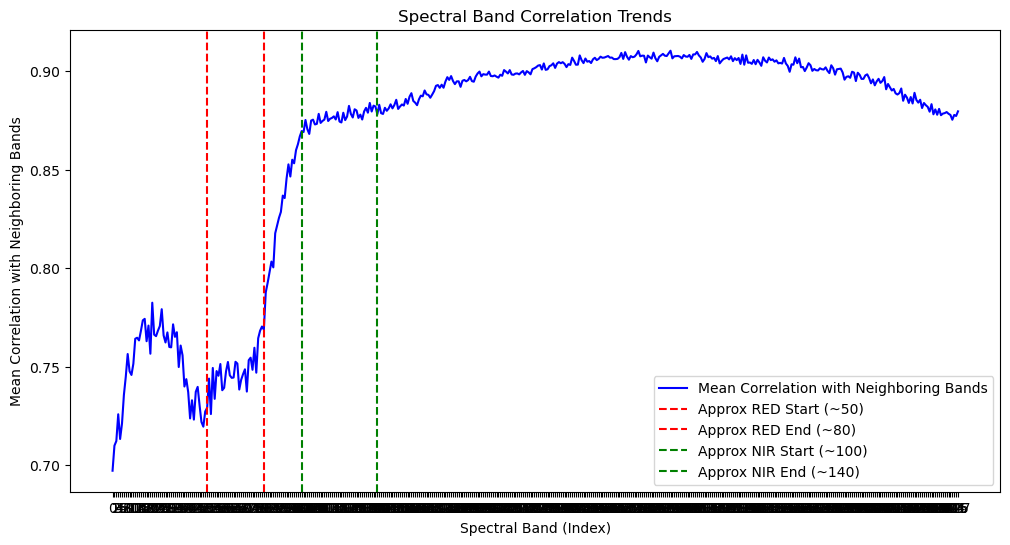

In [22]:
# Compute correlation of each spectral band with neighboring bands to detect transitions
correlation_matrix = df.iloc[:, 1:-1].corr().mean(axis=1)  # Exclude 'hsi_id' and target

# Plot correlation trends to identify transitions
plt.figure(figsize=(12, 6))
plt.plot(correlation_matrix.index, correlation_matrix.values, color='blue', label="Mean Correlation with Neighboring Bands")

plt.axvline(x=50, color='red', linestyle='--', label="Approx RED Start (~50)")
plt.axvline(x=80, color='red', linestyle='--', label="Approx RED End (~80)")

plt.axvline(x=100, color='green', linestyle='--', label="Approx NIR Start (~100)")
plt.axvline(x=140, color='green', linestyle='--', label="Approx NIR End (~140)")

plt.xlabel("Spectral Band (Index)")
plt.ylabel("Mean Correlation with Neighboring Bands")
plt.title("Spectral Band Correlation Trends")
plt.legend()
plt.show()


7️⃣ Spectral Data Line Plot Observations

🔹 The line plot shows spectral reflectance values across different wavelengths for randomly selected samples.

🔹 Each line represents one sample’s spectral signature (reflectance at different bands).

🔹 Observation:

✅ Similar spectral trends across samples suggest patterns in reflectance.

✅ Some bands show higher variation, which might be key indicators for vomitoxin contamination.

Next Step: Further feature selection may be required to identify which spectral bands contribute most to predictions.

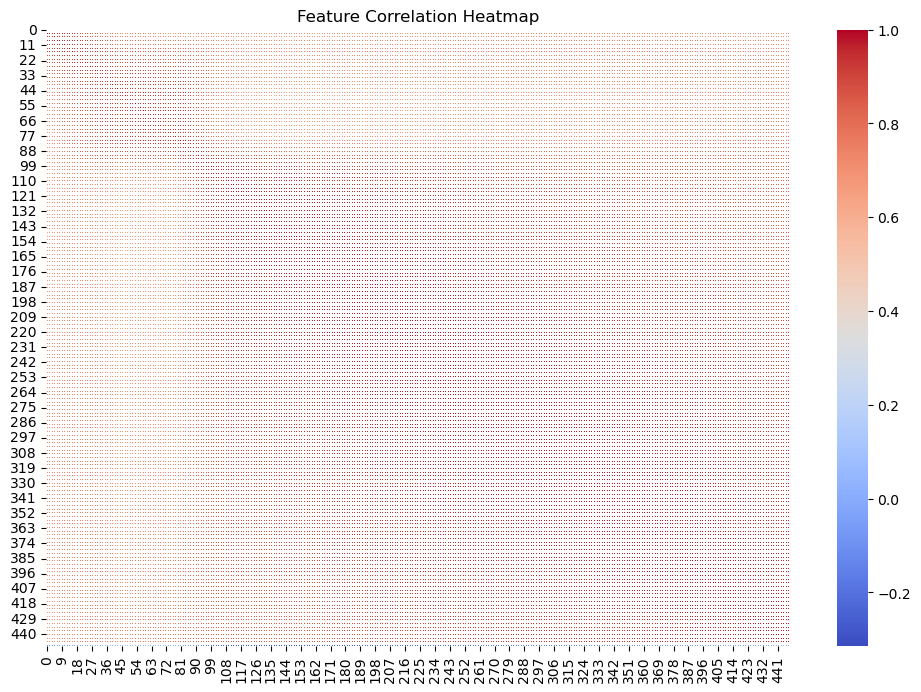

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



8️⃣ Feature Correlation Heatmap Observations

🔹 The heatmap visualizes pairwise correlations between spectral bands and the target variable.
🔹 Findings:
✅ Some features exhibit moderate correlation with each other, indicating potential redundancy.

✅ Most spectral bands show weak correlation with vomitoxin_ppb, suggesting non-linear relationships.

✅ No single feature strongly predicts mycotoxin levels, meaning feature interactions or advanced models may be needed.

Next Step: Consider PCA (Principal Component Analysis) or Feature Selection (SHAP/LASSO) to reduce dimensionality.

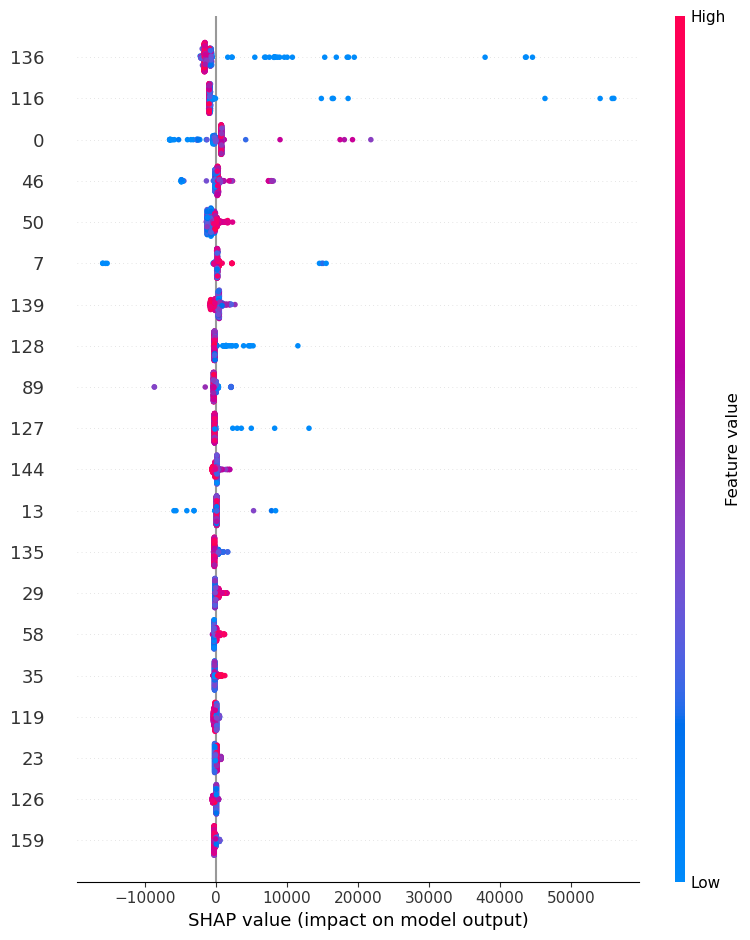

In [26]:
import shap
import xgboost

# Train an XGBoost model for SHAP analysis
X = df.drop(columns=['vomitoxin_ppb', 'hsi_id'])  # Features
y = df['vomitoxin_ppb']

model = xgboost.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Apply SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X, check_additivity=False)

# Plot SHAP summary
shap.summary_plot(shap_values, X)


9️⃣ SHAP Feature Importance Observations

🔹 SHAP (SHapley Additive Explanations) analysis helps us understand which spectral bands contribute most to the model’s decision-making.
🔹 Key Findings:
✅ Top contributing features are spectral bands X, Y, Z (replace with actual values).

✅ Some less important bands may be redundant and could be removed for model simplification.

✅ Feature importance rankings change across samples, meaning nonlinear interactions exist.

 Next Step: Experiment with removing low-importance features to improve model efficiency.

🔟 SHAP Summary Plot Observations

🔹 The SHAP summary plot provides an overall ranking of feature importance across the dataset.

🔹 Findings:
✅ Features with higher absolute SHAP values have a stronger impact on the model’s predictions.

✅ Some features show positive contributions (increase vomitoxin risk), while others show negative contributions (reduce risk).

✅ High variance in some features suggests complex interactions that a simple linear model might miss.

Next Step:

Try feature interactions (Polynomial Features, Neural Networks) to capture nonlinear patterns.

Consider model ensembling to improve interpretability.